In [ ]:
import dask.dataframe as dd

In [ ]:
cols = ['popularity_by_hour','popularity_by_day','distance_from_home','raw_visitor_counts','safegraph_place_id']
df = dd.read_csv('./data/2020/**/*.csv.gz', compression='gzip', dtype={'poi_cbg': 'float64'})[cols].get_partition(0).compute()
df.set_index('safegraph_place_id', inplace=True)
df

In [ ]:
core_poi_cols = ['safegraph_place_id', 'location_name', 'top_category', 'sub_category',
                 'latitude', 'longitude', 'street_address', 'city', 'region', 'postal_code',
                 'iso_country_code', 'phone_number','open_hours']
core_poi_df = dd.read_csv('./data/core*.csv.gz', compression='gzip', dtype={'opened_on': 'object'})[core_poi_cols].compute()
core_poi_df.set_index('safegraph_place_id', inplace=True)
core_poi_df

In [ ]:
supplemental_cols = ['safegraph_place_id', 'area_square_feet']
supplemental = dd.read_csv('./data/SafeGraphPlacesGeoSupplementSquareFeet.csv.gz', compression='gzip')[supplemental_cols].compute()
supplemental.set_index('safegraph_place_id', inplace=True)
supplemental

In [ ]:
df_full = (df.merge(core_poi_df, left_index=True, right_index=True)
             .merge(supplemental, left_index=True, right_index=True))
df_full

In [ ]:
import json
from functools import partial
from functools import lru_cache

def add_day_columns(row, day):
    return json.loads(row['popularity_by_day'])[day]

def add_hour_columns(row, hour):
    return json.loads(row['popularity_by_hour'])[hour]

days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hours = list(range(24))

for d in days:
    df_full[d] = df_full.apply(partial(add_day_columns, day=d), axis=1)

for h in hours:
    df_full[f'hour_{h+1}'] = df_full.apply(partial(add_hour_columns, hour=h), axis=1)
    
df_full

In [1]:
df_full.to_csv('./data/full_data.csv')

NameError: name 'df_full' is not defined

In [2]:
import geopandas
import pandas as pd
df_full = pd.read_csv('./data/full_data.csv')
df_full

,safegraph_place_id,popularity_by_hour,popularity_by_day,distance_from_home,raw_visitor_counts,location_name,top_category,sub_category,latitude,longitude,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,sg:002921847f104c93a6df47bb831dedd2,"[116,121,116,116,114,114,115,120,120,123,126,1...","{""Monday"":66,""Tuesday"":76,""Wednesday"":55,""Thur...",4871.0,294,Tenth Avenue Park,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,42.255103,-89.085241,...,122,156,200,206,175,116,136,146,112,113
1,sg:002d2e9f047d47ca8661abb8939096cf,"[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda...",NaN,2,Hunter Village Wines & Liquors,"Beer, Wine, and Liquor Stores","Beer, Wine, and Liquor Stores",42.214633,-74.220827,...,1,1,0,0,0,0,0,0,0,0
2,sg:0060616e5f184585a026a0b7e8192fbd,"[0,0,0,1,0,0,0,1,13,15,12,15,20,13,12,8,6,2,3,...","{""Monday"":5,""Tuesday"":8,""Wednesday"":6,""Thursda...",12985.0,16,Fat Moe's,Restaurants and Other Eating Places,Full-Service Restaurants,40.948824,-74.154553,...,12,8,6,2,3,1,1,0,0,0
3,sg:0061c1d8e124406cbcc97e40eb1dd585,"[1,1,1,1,1,5,2,0,1,8,16,19,27,29,29,31,34,20,9...","{""Monday"":9,""Tuesday"":6,""Wednesday"":12,""Thursd...",14380.0,64,Jungle Rapids Family Fun Park,Amusement Parks and Arcades,Amusement and Theme Parks,34.206863,-77.863068,...,29,31,34,20,9,8,8,8,4,1
4,sg:0083eaf7f3674a8994b622a5f432d591,"[0,0,0,0,0,0,1,2,3,6,7,6,8,8,6,2,3,4,1,0,0,0,0,0]","{""Monday"":4,""Tuesday"":7,""Wednesday"":5,""Thursda...",7710.0,12,Brunswick Zone XL Blaine,Other Amusement and Recreation Industries,Bowling Centers,45.176693,-93.236549,...,6,2,3,4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039214,sg:ffa0dfe7c1444e8295b5c057d89b1af4,"[1,1,1,1,1,1,2,4,4,7,12,6,4,5,7,5,3,16,13,1,0,...","{""Monday"":10,""Tuesday"":10,""Wednesday"":5,""Thurs...",5141.0,34,Exeter Family Practice,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,40.317663,-75.872835,...,7,5,3,16,13,1,0,0,1,1
1039215,sg:ffc82a97e5db4a518a484e731863bda5,"[0,0,0,0,1,17,0,4,2,8,5,5,8,6,5,12,8,8,2,2,9,5...","{""Monday"":9,""Tuesday"":11,""Wednesday"":15,""Thurs...",18994.0,75,Crystal Springs One Stop,Gasoline Stations,Gasoline Stations with Convenience Stores,33.852812,-85.914966,...,5,12,8,8,2,2,9,5,1,0
1039216,sg:ffc96cc19acc44a2a4807db939c77d22,"[0,0,0,0,0,0,8,19,29,33,33,34,32,37,43,42,29,1...","{""Monday"":14,""Tuesday"":21,""Wednesday"":20,""Thur...",14803.0,31,Olympiad Gymnastics,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,39.712298,-75.600256,...,43,42,29,13,6,1,1,2,2,0
1039217,sg:ffd4f9c8492949289ec957a1e0cda8cb,"[0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,2,2,0,0,0,0,0,0]","{""Monday"":2,""Tuesday"":1,""Wednesday"":0,""Thursda...",45812.0,6,Tanager Holdings,"Electric Power Generation, Transmission and Di...",Fossil Fuel Electric Power Generation,35.752713,-79.784610,...,1,1,2,2,0,0,0,0,0,0


In [3]:
df_full.sub_category.unique()

array(['Nature Parks and Other Similar Institutions',
       'Beer, Wine, and Liquor Stores', 'Full-Service Restaurants',
       'Amusement and Theme Parks', 'Bowling Centers',
       'Offices of Physicians (except Mental Health Specialists)',
       'Retail Bakeries', 'Hardware Stores',
       'Hotels (except Casino Hotels) and Motels', 'Consumer Lending',
       'Offices of Real Estate Agents and Brokers', 'Florists',
       'Fitness and Recreational Sports Centers', 'Used Car Dealers',
       'Electronics Stores',
       'Sporting and Recreational Goods and Supplies Merchant Wholesalers',
       'Elementary and Secondary Schools', 'Beauty Salons',
       "Drugs and Druggists' Sundries Merchant Wholesalers",
       'Supermarkets and Other Grocery (except Convenience) Stores',
       'Commercial Printing (except Screen and Books)',
       'Sports Teams and Clubs', 'General Automotive Repair',
       'Jewelry Stores', 'Parking Lots and Garages',
       'Snack and Nonalcoholic Beverage 

In [23]:
streets = geopandas.read_file('zip://./data/Street Centerline.zip')
streets = streets.to_crs({'init': 'epsg:4326'})

/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [24]:
xs = []
ys = []
for s in streets.geometry.values:
    try:
        coords = s.coords.xy
        xs += coords[0].tolist()
        ys += coords[1].tolist()
        
        xs.append(np.nan)
        ys.append(np.nan)
    except:
        continue
        
street_df = pd.DataFrame(dict(x=xs, y=ys))
street_df

,x,y
0,-97.683275,30.313282
1,-97.682387,30.313545
2,NaN,NaN
3,-97.839164,30.520563
4,-97.839158,30.520697
...,...,...
425781,-97.794021,30.441096
425782,NaN,NaN
425783,-98.021327,30.385060
425784,-98.022147,30.385474


## 1. Define Study Area based on Willingness to Travel

In [25]:
import datashader as ds
import datashader.transfer_functions as tf

import pandas as pd
import numpy as np

from datashader.colors import viridis, inferno
from xrspatial.utils import height_implied_by_aspect_ratio
from xrspatial import quantile
from xrspatial import mean
from xrspatial import crop
from xrspatial import hillshade

x_range, y_range = (( -97.91,  -97.52), (30.17, 30.37))

W = 900
H = height_implied_by_aspect_ratio(W, x_range, y_range)

cvs = ds.Canvas(plot_width=W, plot_height=H,
                x_range=x_range, y_range=y_range)

/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


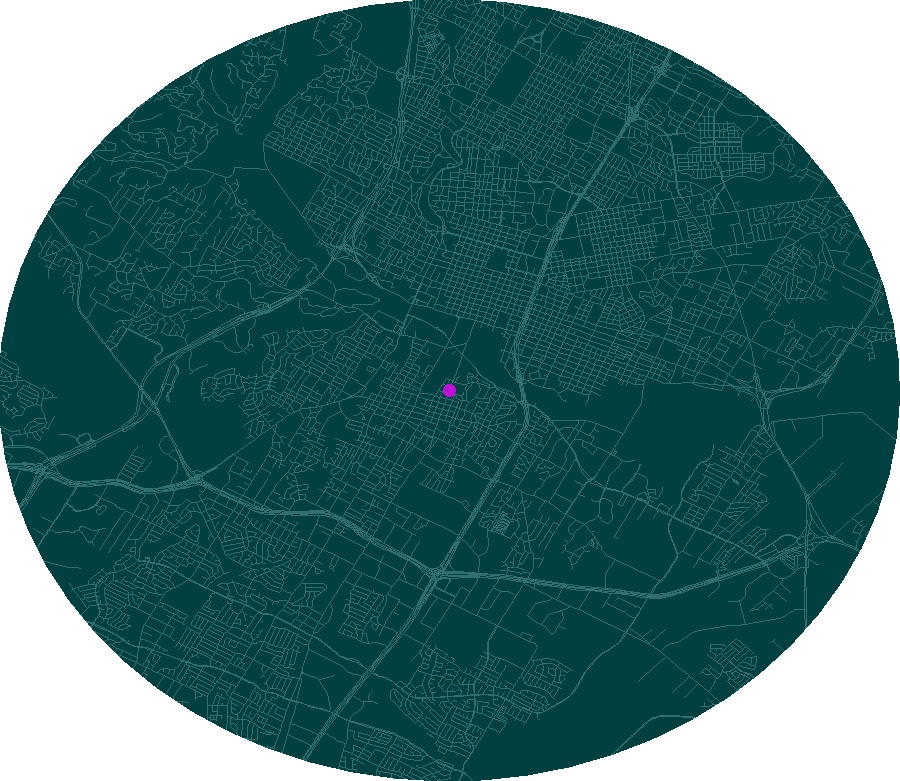

In [26]:
from geopandas import GeoDataFrame
import spatialpandas

import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point

from xrspatial import mean

MY_LOCATION_X = -97.7493953
MY_LOCATION_Y = 30.2505122
TRAVEL_RADIUS_MILES = 5
TRAVEL_METERS = (TRAVEL_RADIUS_MILES * 1000) * 1.60934
STORE_TYPE = 'Supermarkets and Other Grocery (except Convenience) Stores'

df = pd.DataFrame({
   'x': [MY_LOCATION_X],
   'y': [MY_LOCATION_Y],
   'id': [1]
})

gdf = GeoDataFrame(
    df.drop(['x', 'y'], axis=1),
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(df.x, df.y)])

-

travel_gdf = spatialpandas.GeoDataFrame(travel_buffer, geometry='geometry')
buffer_agg = cvs.polygons(travel_gdf, geometry='geometry')


# Create a new Canvas based on study area cropped to willingness to travel
buffer_agg = crop(buffer_agg, buffer_agg, [1])

new_x_range = (buffer_agg.coords['x'].min().item(),
               buffer_agg.coords['x'].max().item())

new_y_range = (buffer_agg.coords['y'].min().item(),
               buffer_agg.coords['y'].max().item())

H = height_implied_by_aspect_ratio(W, new_x_range, new_y_range)

new_cvs = ds.Canvas(plot_width=W, plot_height=H,
                x_range=new_x_range, y_range=new_y_range)

buffer_agg = new_cvs.polygons(travel_gdf, geometry='geometry')
buffer_agg = crop(buffer_agg, buffer_agg, [1])

buffer_img = tf.shade(buffer_agg, cmap=['aqua', 'aqua'], alpha=64)
buffer_bg_img = tf.shade(buffer_agg, cmap=['white', 'black'])

points_agg = new_cvs.points(df, x='x', y='y')
points_img = tf.dynspread(tf.shade(points_agg, cmap=['#f000ff',  '#f000ff'], alpha=200),
                             threshold=1,
                             max_px=6)

streets_agg = new_cvs.line(street_df, x='x', y='y')
streets_agg = streets_agg.where(buffer_agg.astype('int'))
streets_agg.data[streets_agg.data == 0] = np.nan


streets_img = tf.shade(streets_agg, cmap=['gray', 'gray'], alpha=128)

img = tf.stack(buffer_bg_img, streets_img, buffer_img, points_img)
img.name = "Study Area: Austin, TX"
img

In [40]:
import idw # external module located next to notebook
import xarray as xr
from xrspatial import quantile, a_star_search

def create_idw_heatmap(points, area_grid,
                       coord_fields=['longitude', 'latitude'],
                       value_field='people_per_square_foot', k=10):

    locations = points[coord_fields].values
    values = points[value_field].values

    idw_tree = idw.tree(locations, values)
    idw_tree

    X2 = np.meshgrid(area_grid[coord_fields[0]], area_grid[coord_fields[1]])
    grid_shape = X2[0].shape
    X2 = np.reshape(X2, (2, -1)).T
    arr = idw_tree(X2, k=k).reshape(area_grid.shape)
    
    return xr.DataArray(arr,
                        name='idw_heatmap',
                        coords=area_grid.coords,
                        dims=area_grid.dims,
                        attrs=area_grid.attrs)

def get_stores(sub_category):
    stores = df_full[df_full['sub_category'] == sub_category]
    stores['SIMPLE_ID'] = np.arange(len(stores))
    stores_agg = new_cvs.points(stores, x='longitude', y='latitude')
    stores_agg.name = sub_category
    
    stores_agg = new_cvs.points(stores, x='longitude', y='latitude', agg=ds.max('SIMPLE_ID'))
    stores_agg = stores_agg.where(buffer_agg.data.astype('int'))
    stores_agg.data[stores_agg.data == 0] = np.nan
    stores_img = tf.shade(stores_agg, cmap=['aqua', 'aqua'])
    stores_img = tf.dynspread(stores_img, threshold=1, max_px=5)
    stores_img.name = sub_category
    streets = streets_agg.copy()
    streets.data = streets.data + stores_agg.data
    streets.data[streets.data > 0] = 1
    streets.data[streets.data != 1] = 0
    
    available_stores = stores[stores['SIMPLE_ID'].isin(np.unique(stores_agg.data))]
    available_stores['people_per_square_foot'] = available_stores['hour_12'] / available_stores['area_square_feet']
    winner = available_stores.loc[available_stores['people_per_square_foot'].idxmin()]
    print(f'WINNER: {sub_category} - {winner.location_name} - {winner.street_address}')
    xs = [MY_LOCATION_X]
    ys = [MY_LOCATION_Y]
    try:
        path, cost = a_star_search(streets, (MY_LOCATION_X, MY_LOCATION_Y),
                                            (winner.longitude, winner.longitude),
                                   barriers=[0],
                                            x='x', y='y')
    
        
    
        for ix, iy in path:
            x = streets_agg[iy, ix].coords['x'].data.tolist()
            y = streets_agg[iy, ix].coords['y'].data.tolist()
            xs.append(x)
            ys.append(y)
    
        xs.append(winner.longitude)
        ys.append(winner.latitude)
    
    except ValueError:
        xs = [MY_LOCATION_X, winner.longitude]
        ys = [MY_LOCATION_Y, winner.latitude]
        
    connections = pd.DataFrame(dict(x=xs, y=ys))
    
    connections_agg = new_cvs.line(connections, x='x', y='y')
    connections_img = tf.shade(connections_agg, cmap='lime', alpha=128)
    connections_img = tf.dynspread(connections_img, threshold=1, max_px=1)
    
    heat = create_idw_heatmap(available_stores, stores_agg, k=3).where(buffer_agg.data.astype('int'))
    
    idw_heatmap_img = tf.shade(heat, cmap=['teal', 'goldenrod', 'orange'], alpha=128)

    final_img = tf.stack(buffer_bg_img, buffer_img,
                         streets_img,
                         idw_heatmap_img,
                         connections_img,
                         stores_img,
                         points_img)
    final_img.name = sub_category
    
    return [final_img, winner['location_name']]


def facet_store_by_retail_category(stores_df):
    cats = [
        'Pharmacies and Drug Stores',
        'Supermarkets and Other Grocery (except Convenience) Stores',
        'Veterinary Services',
        'Used Car Dealers',
        "Women's Clothing Stores",
        "Hardware Stores",
        "Retail Bakeries",
        "Paint and Wallpaper Stores",
        'Jewelry Stores'
    ]
    results = []
    for c in cats:
        result = get_stores(c)
        if 'Supermarkets' in c:
            result[0].name = 'Supermarkets'
        result.append('Best Choice:')
        results.append(result)

    return results

def _repr_html_(self):
    """Supports rich HTML display in a Jupyter notebook"""
    # imported here to avoid depending on these packages unless actually used
    from io import BytesIO
    from base64 import b64encode

    b = BytesIO()
    self.to_pil().save(b, format='png')

    h = """<img style="margin: auto; border: 0px solid" """ + \
            """src='data:image/png;base64,{0}'/>""".\
                format(b64encode(b.getvalue()).decode('utf-8'))
    return h


class Images(object):
    """
    A list of HTML-representable objects to display in a table.
    Primarily intended for Image objects, but could be anything
    that has _repr_html_.
    """

    def __init__(self, *images):
        """Makes an HTML table from a list of HTML-representable arguments."""
        self.images = images
        self.num_cols = None

    def cols(self,n):
        """
        Set the number of columns to use in the HTML table.
        Returns self for convenience.
        """
        self.num_cols = n
        return self

    def _repr_html_(self):
        """Supports rich display in a Jupyter notebook, using an HTML table"""
        htmls = []
        col=0
        tr="""<tr style="background-color:white;padding:5px;">"""
        for img, winner, subtitle in self.images:
            label=img.name if hasattr(img,"name") and img.name is not None else ""
            
            imgf = _repr_html_(img)

            htmls.append("""<td style="text-align: center; border: 1px solid; padding:5px;"><h1>""" + label +
                         """</h1><br><br>{0}<h5>{2}<br>{1}</h5></td>""".format(imgf, winner, subtitle))
            col+=1
            if self.num_cols is not None and col>=self.num_cols:
                col=0
                htmls.append("</tr>"+tr)

        return """<table style="width:100%; text-align: left;"><tbody>"""+ tr +\
               "".join(htmls) + """</tr></tbody></table>"""

In [41]:
results = facet_store_by_retail_category(df_full)
results

/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Pharmacies and Drug Stores - CVS - 2021 Guadalupe St


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Supermarkets and Other Grocery (except Convenience) Stores - The Four Five - 5212 Manchaca Rd


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Veterinary Services - VCA Animal Hospitals - 2417 W Ben White Blvd


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Used Car Dealers - Peddle - 111 W 6th St Ste 300


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Women's Clothing Stores - Bird - 1500 S Lamar Blvd Ste 140


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Hardware Stores - Bluebonnet Custom Roofing - 600 Congress Ave Fl 14


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Retail Bakeries - Cakes ROCK - 4201 S Congress Ave Ste 101


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Paint and Wallpaper Stores - Michael Yates Design - 405 Springdale Rd


/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brendan/miniconda3/envs/safegraph/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WINNER: Jewelry Stores - Texas Custom Boots - 1601 S 1st St


[[<xarray.Image 'Pharmacies and Drug Stores' (y: 781, x: 900)>
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
  Coordinates:
    * x        (x) float64 -97.83 -97.83 -97.83 -97.83 ... -97.67 -97.67 -97.67
    * y        (y) float64 30.18 30.18 30.18 30.18 ... 30.32 30.32 30.32 30.32,
  'CVS',
  'Best Choice:'],
 [<xarray.Image 'Supermarkets' (y: 781, x: 900)>
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
  Coordinates:
    * x        (x) float64 -97.83 -97.83 -97.83 -97.83 ... -97.67 -97.67 -97.67
    * y        (y) float64 30.18 30.18 30.18 30.18 ... 30.32 30.32 30.32 30.32,
  'The Four Five',
  'Best Choice:'],
 [<xar

Pharmacies and Drug StoresBest Choice:CVS,SupermarketsBest Choice:The Four Five,Veterinary ServicesBest Choice:VCA Animal Hospitals
Used Car DealersBest Choice:Peddle,Women's Clothing StoresBest Choice:Bird,Hardware StoresBest Choice:Bluebonnet Custom Roofing
Retail BakeriesBest Choice:Cakes ROCK,Paint and Wallpaper StoresBest Choice:Michael Yates Design,Jewelry StoresBest Choice:Texas Custom Boots

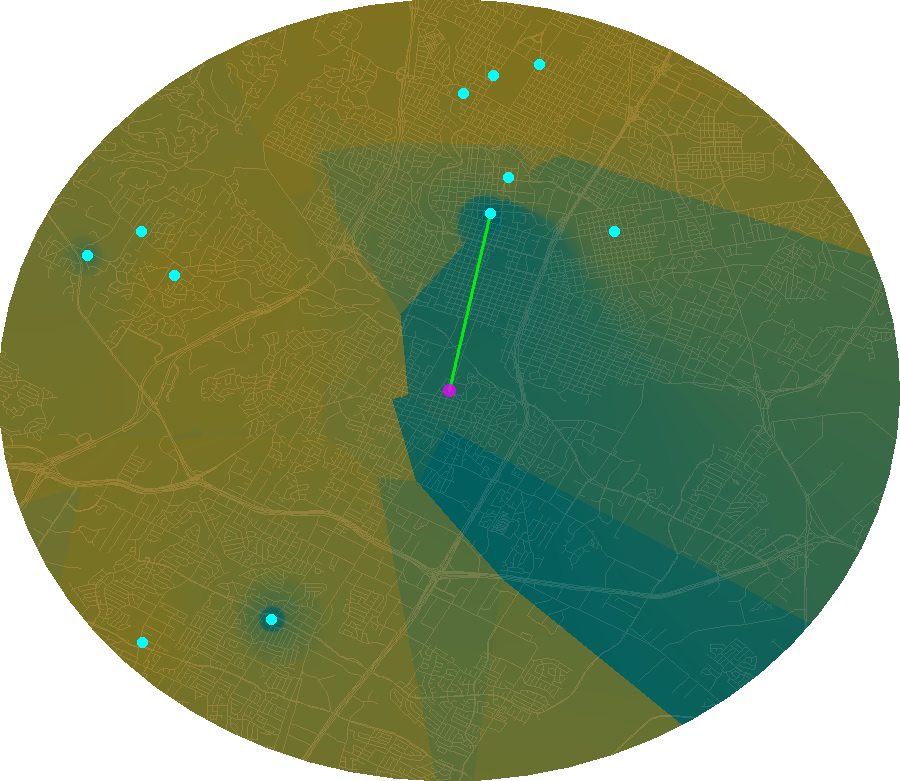
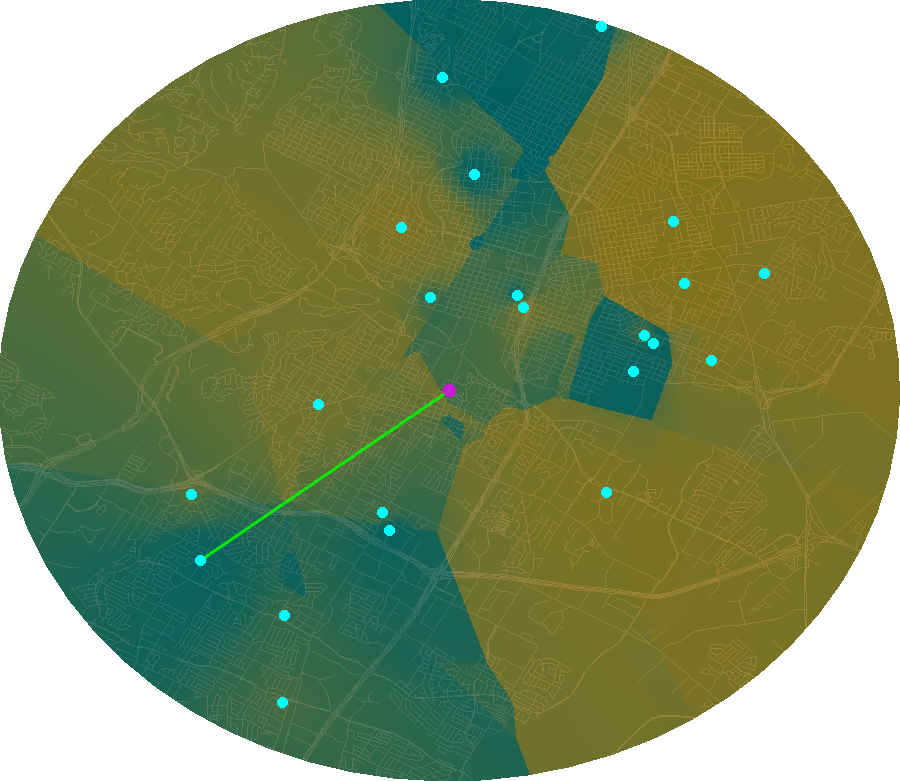
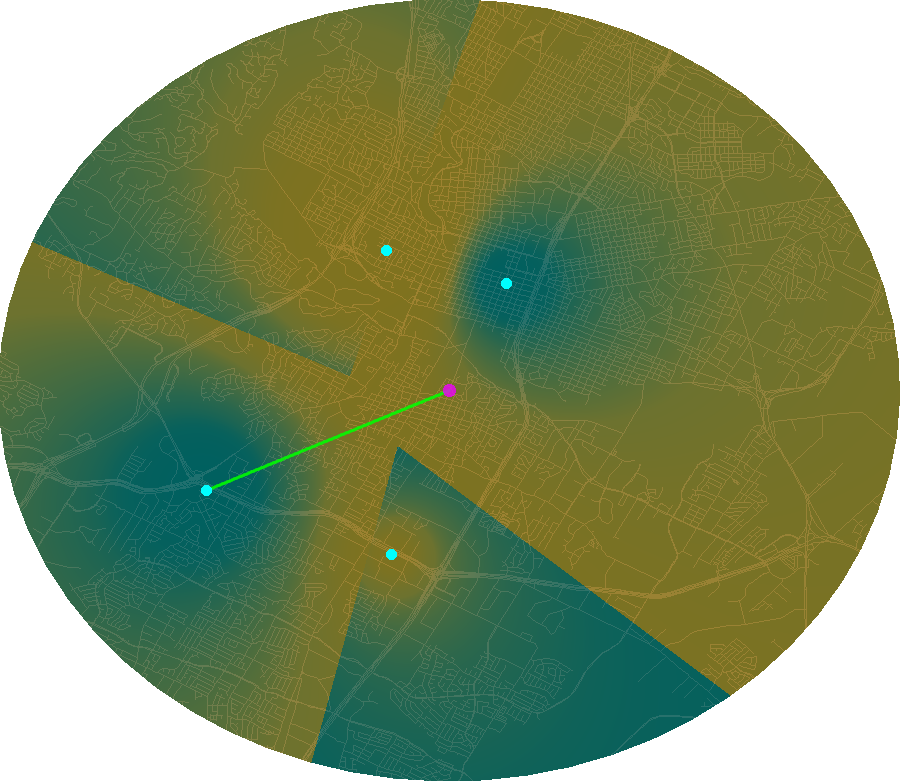
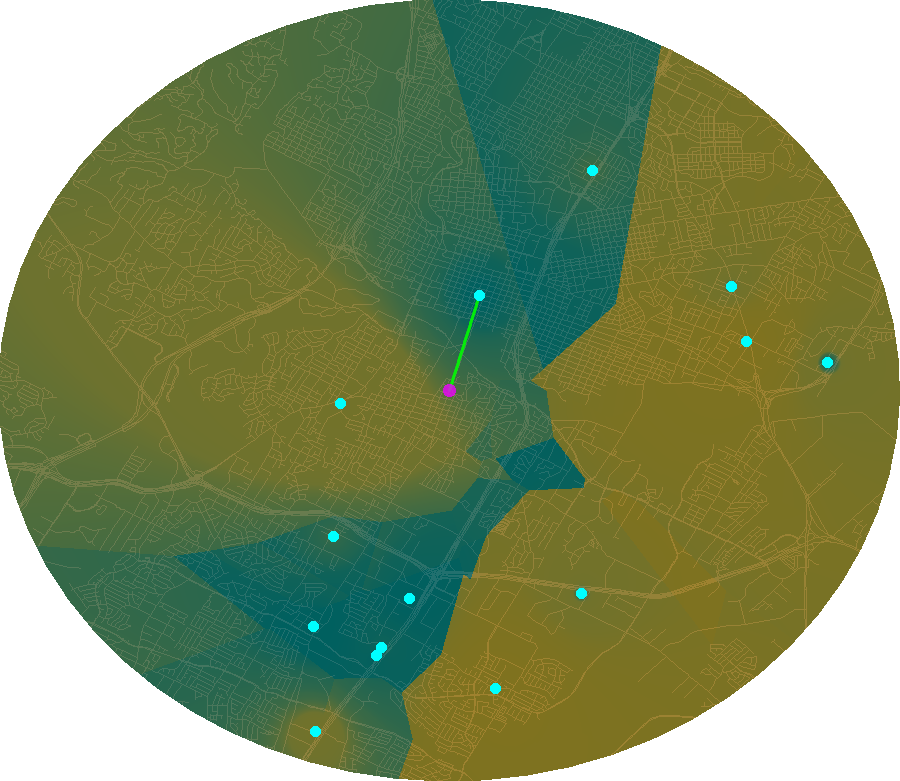
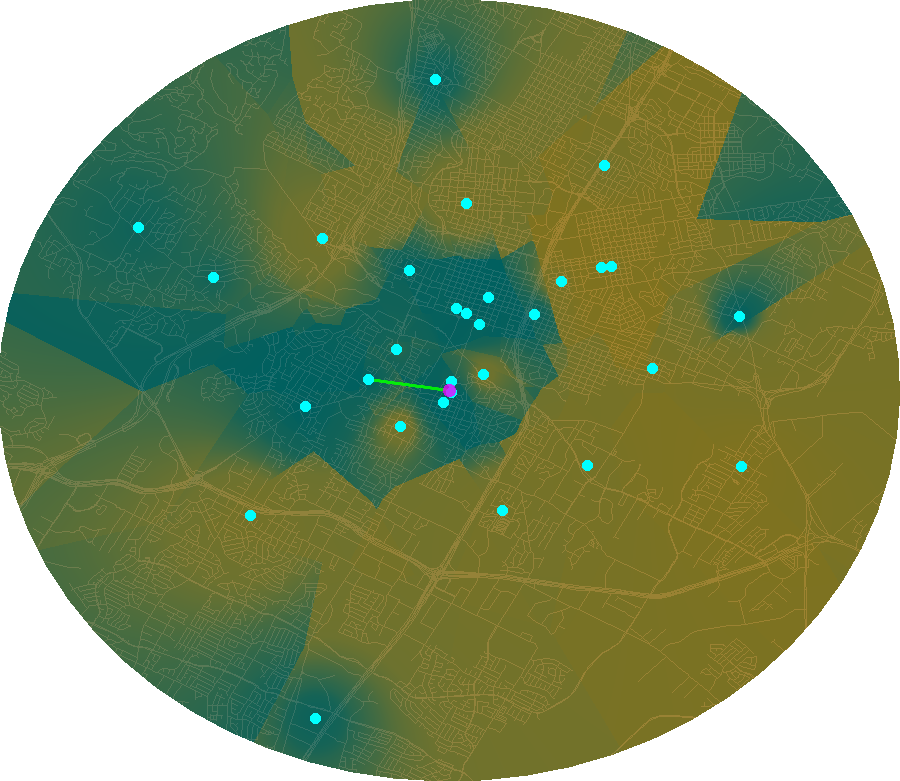
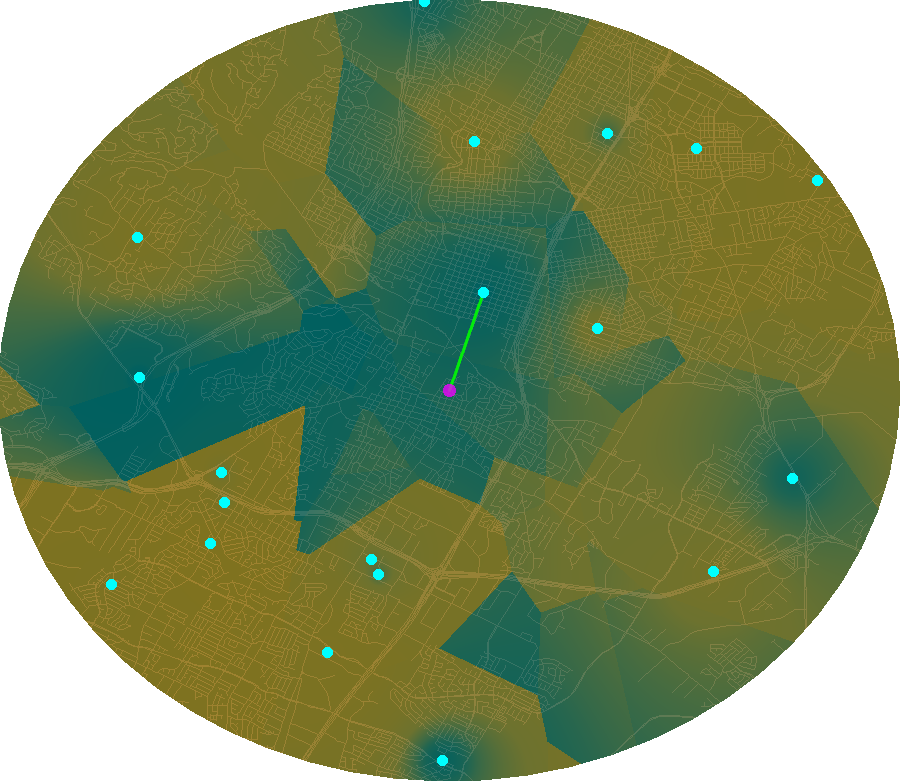
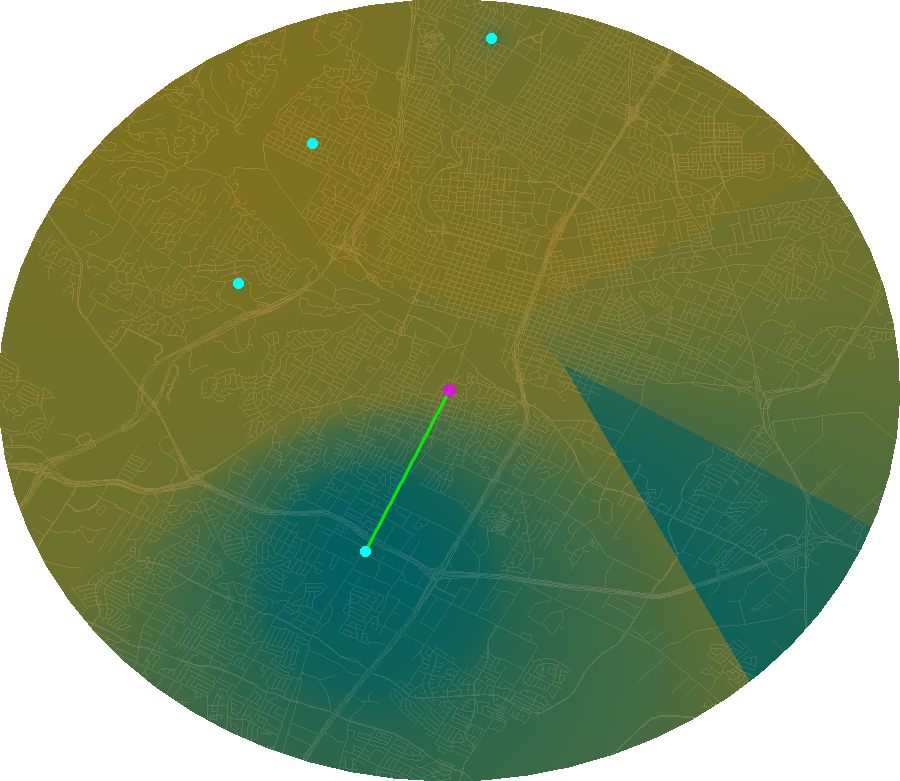
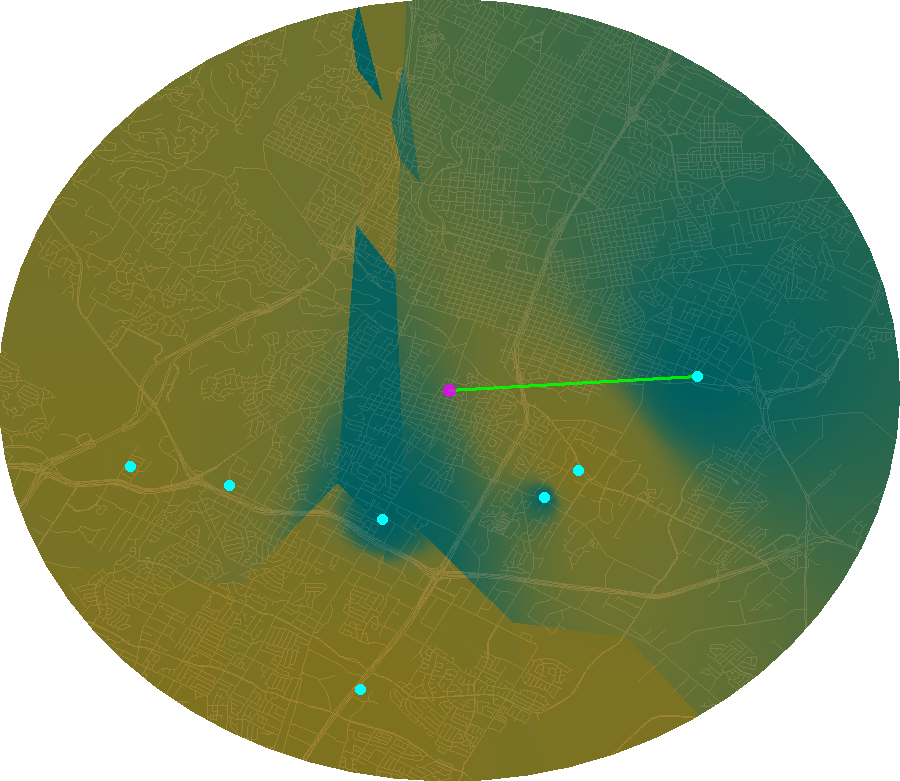
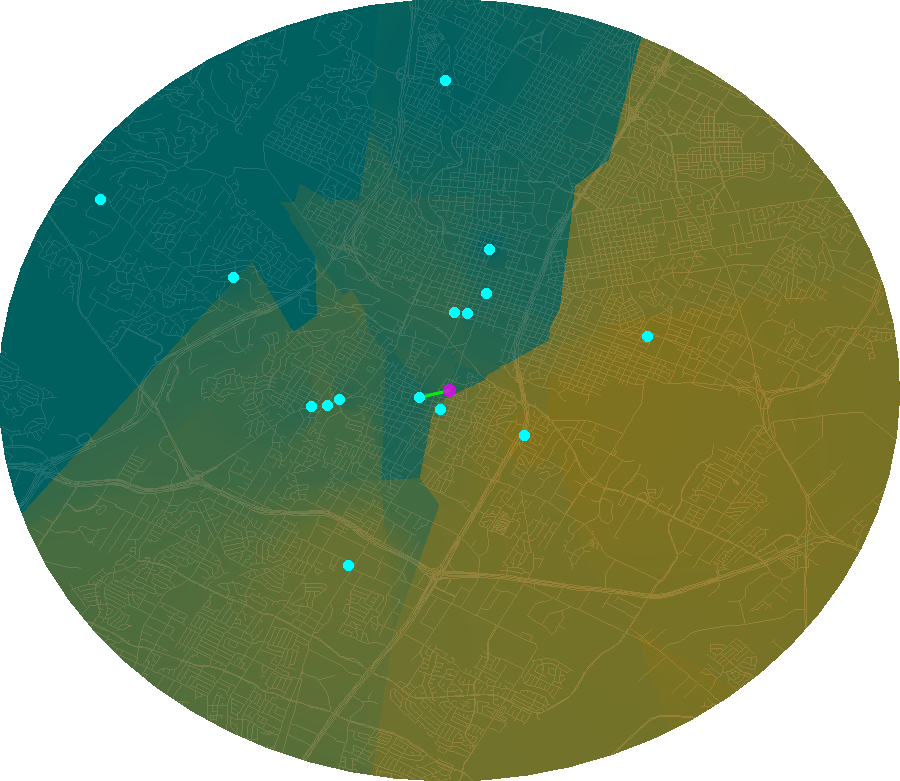

In [38]:
imggrid = Images(*results)
imggrid.num_cols = 3
imggrid

"Study Area: Austin, TXCurrent Location with 5km Travel Radius","Study Area: Austin, TXCurrent Location with 5km Travel Radius","Study Area: Austin, TXCurrent Location with 5km Travel Radius"

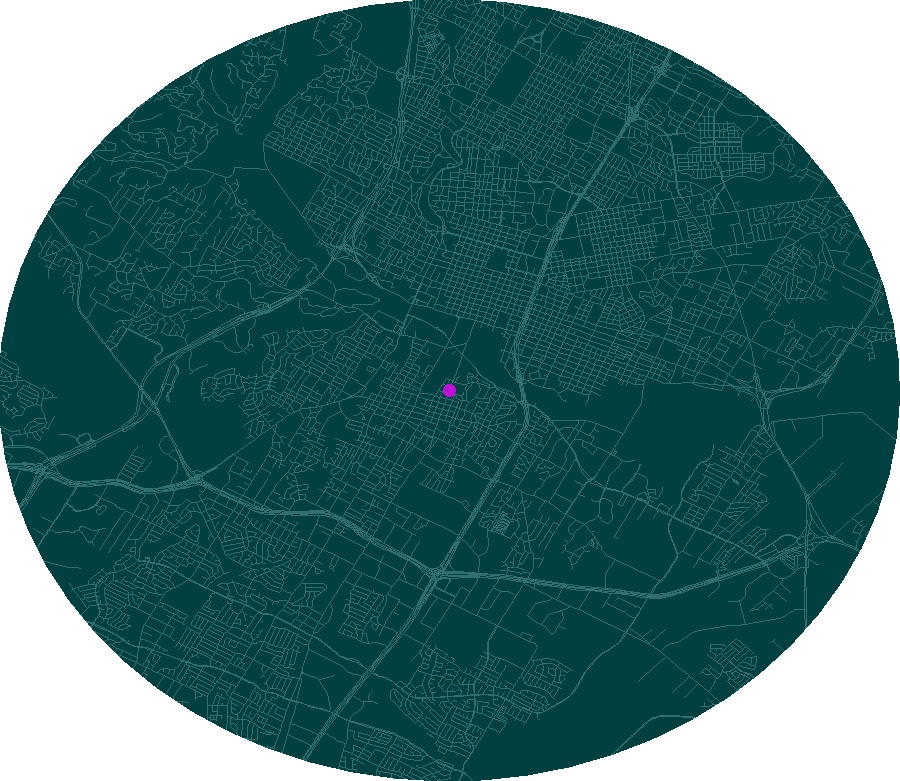
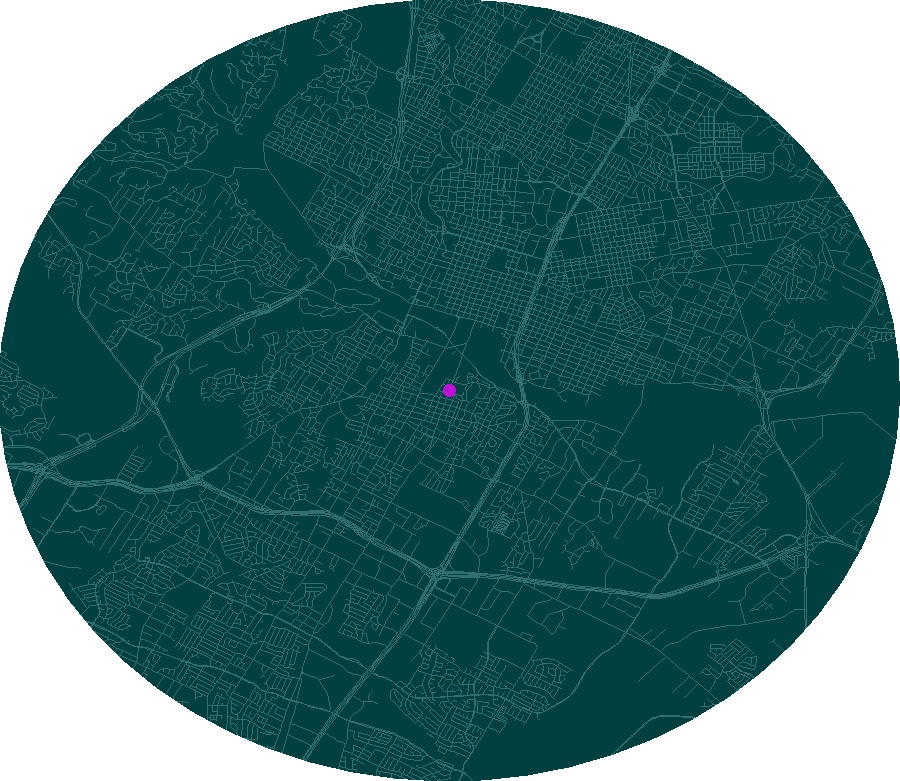
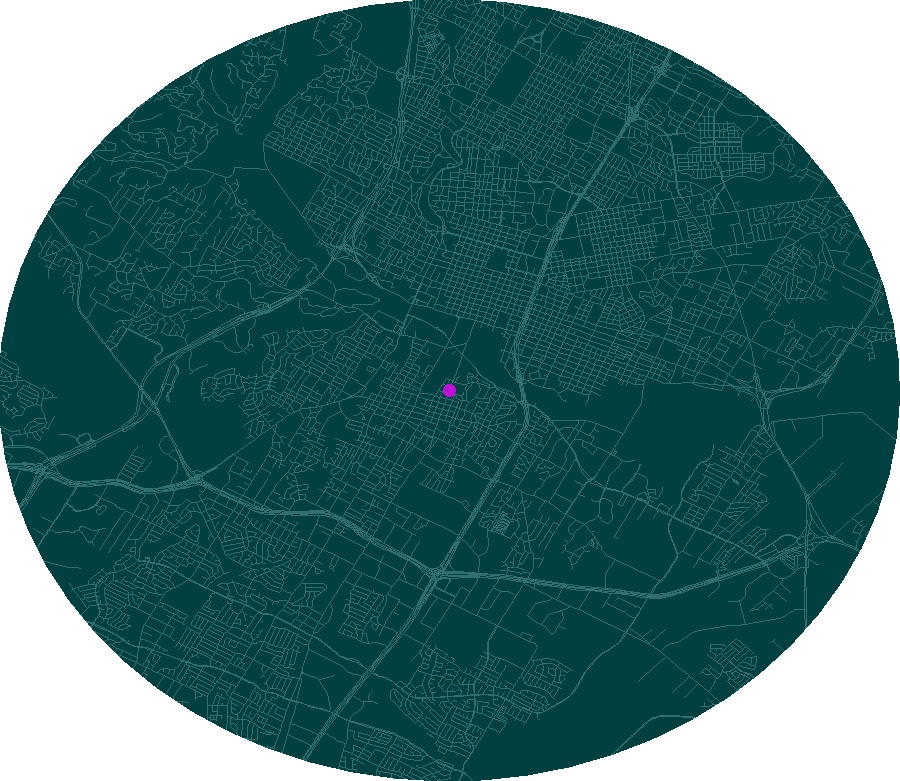

In [17]:
study_area = (img, 'Current Location with 5km Travel Radius', '')
imggrid = Images(study_area,study_area,study_area)
imggrid

In [ ]:
new_x_range = (cropped_streets_agg.coords['x'].min().item(),
               cropped_streets_agg.coords['x'].max().item())

new_y_range = (cropped_streets_agg.coords['y'].min().item(),
               cropped_streets_agg.coords['y'].max().item())

W = 800
H = height_implied_by_aspect_ratio(W, new_x_range, new_y_range)

new_cvs = ds.Canvas(plot_width=W, plot_height=H,
                x_range=new_x_range, y_range=new_y_range)

buffer_agg = new_cvs.polygons(travel_gdf, geometry='geometry')
buffer_img = tf.shade(buffer_agg, cmap=['aqua', 'aqua'], alpha=128)

stores_agg = new_cvs.points(stores, x='longitude', y='latitude', agg=ds.max('SIMPLE_ID'))
stores_agg = stores_agg.where(buffer_agg.data.astype('int'))
stores_agg.data[stores_agg.data == 0] = np.nan
stores_img = tf.shade(stores_agg, cmap=['aqua', 'aqua'])
stores_img = tf.dynspread(stores_img, threshold=1, max_px=3)

streets_agg = new_cvs.line(street_df, x='x', y='y')
streets_agg = streets_agg.where(buffer_agg.data.astype('int'))
streets_agg.data[streets_agg.data == 0] = np.nan
streets_img = tf.shade(streets_agg, cmap=['white', 'white'], alpha=64)

points_agg = new_cvs.points(df, x='x', y='y')
points_agg = points_agg.where(buffer_agg.data.astype('int'))
points_agg.data[points_agg.data == 0] = np.nan
points_img = tf.dynspread(tf.shade(points_agg, cmap=['black',  '#f000ff']),
                             threshold=1,
                             max_px=6)

img = tf.stack(streets_img, connections_img, points_img, stores_img, )
img = tf.set_background(img, 'black')
img

## Which stores should I consider?

#### Analysis Inputs

In [ ]:
def get_stores(sub_category):
    stores = df_full[df_full['sub_category'] == STORE_TYPE]
    stores['SIMPLE_ID'] = np.arange(len(stores))
    stores_agg = cvs.points(stores, x='longitude', y='latitude')
    stores_agg.name = sub_category
    return stores_agg
    #stores_img = tf.shade(stores_agg, cmap=['limegreen', 'limegreen'])
#stores_img = tf.dynspread(stores_img, threshold=1, max_px=3)
#stores_img

Focus in on just the area within willingness to travel

In [ ]:
import idw # external module located next to notebook
import xarray as xr
from xrspatial import quantile

def create_idw_heatmap(points, area_grid,
                       coord_fields=['longitude', 'latitude'],
                       value_field='hour_12', k=10):

    locations = points[coord_fields].values
    values = points[value_field].values

    idw_tree = idw.tree(locations, values)
    idw_tree

    X2 = np.meshgrid(area_grid[coord_fields[0]], area_grid[coord_fields[1]])
    grid_shape = X2[0].shape
    X2 = np.reshape(X2, (2, -1)).T
    arr = idw_tree(X2, k=k).reshape(area_grid.shape)
    
    return xr.DataArray(arr,
                        name='idw_heatmap',
                        coords=area_grid.coords,
                        dims=area_grid.dims,
                        attrs=area_grid.attrs)

idw_heatmap = create_idw_heatmap(stores, stores_agg, k=250)
tf.stack(stores_img, tf.shade(idw_heatmap, cmap=['teal', 'black', 'pink']), stores_img)

In [ ]:
cropped_buffer_agg = crop(buffer_agg, buffer_agg, [1])
cropped_buffer_img = tf.shade(cropped_buffer_agg, cmap=['aqua', 'aqua'], alpha=128)

cropped_stores_agg = crop(buffer_agg ,stores_agg, [1])
cropped_stores_img = tf.shade(cropped_stores_agg, cmap=['#74ee15', '#74ee15'])
cropped_stores_img = tf.dynspread(cropped_stores_img, threshold=1, max_px=3)

cropped_points_agg = crop(buffer_agg, points_agg, [1])
cropped_points_img = tf.dynspread(tf.shade(cropped_points_agg, cmap=['#f000ff',  '#f000ff']),
                             threshold=1,
                             max_px=6)

cropped_streets_agg = crop(buffer_agg, streets_agg, [1])
cropped_streets_img = tf.shade(cropped_streets_agg, cmap=['gray', 'gray'])

img = tf.stack(cropped_streets_img, cropped_buffer_img, cropped_points_img, cropped_stores_img)
tf.set_background(img, 'black')

In [ ]:
np.unique(stores_agg.data)

Connect My Location to Store Symbolized by the 

In [ ]:
xs = []
ys = []
popularity = []

for i, row in stores[stores['SIMPLE_ID'].isin(np.unique(stores_agg.data))].iterrows():
                     
    xs.append(MY_LOCATION_X)
    ys.append(MY_LOCATION_Y)
    popularity.append(row['hour_12'])
    
    xs.append(row['longitude'])
    ys.append(row['latitude'])
    popularity.append(row['hour_12'])
    
    xs.append(np.nan)
    ys.append(np.nan)
    popularity.append(row['hour_12'])
    
    
connections = pd.DataFrame(dict(x=xs, y=ys, popularity=popularity))
connections

In [ ]:
connections_agg = new_cvs.line(connections, x='x', y='y', agg=ds.max('popularity'))
connections_agg = connections_agg.where(buffer_agg.data.astype('int'))
connections_agg.data[connections_agg.data == 0] = np.nan
connections_img = tf.shade(connections_agg, cmap=viridis, alpha=64)
connections_img = tf.dynspread(connections_img, threshold=1, max_px=1)
connections_img

### Top 5 Store to Consider Shopping At

In [ ]:
cols = ['location_name', 'longitude', 'latitude', 'hour_15']
top5 = stores[stores['SIMPLE_ID'].isin(np.unique(stores_agg.data))]
top5[cols].sort_values('hour_15')

In [ ]:
import geopandas

buildings = geopandas.read_file('zip://./data/building_footprints_2017.zip')
buildings = buildings.to_crs({'init': 'epsg:4326'})
buildings

In [ ]:
import shapely

def _to_2d(x, y, z):
    return tuple(filter(None, [x, y]))

new_geom = []
for index, row in buildings.iterrows():
    geom = shapely.ops.transform(_to_2d, row['geometry'])
    new_geom.append(geom)

In [ ]:
buildings['geometry'] = new_geom
buildings_sp = spatialpandas.GeoDataFrame(buildings, geometry='geometry')
buildings_agg = cvs.polygons(buildings_sp, geometry='geometry')
buildings_img = tf.shade(buildings_agg, cmap=['black', 'black'])
buildings_img

## Foot traffic Heatmap GIF for Austin Area

In [ ]:
locations = cvs.points(full_df, x='longitude', y='latitude')
shade(locations, cap)

In [57]:
da_stacked = streets_agg.stack(z=['y','x'])
da_stacked[~da_stacked.isnan()]

AttributeError: 'DataArray' object has no attribute 'isnan'

In [60]:
path, cost = a_star_search(streets_agg, (MY_LOCATION_X, MY_LOCATION_Y), (MY_LOCATION_X + .01, MY_LOCATION_Y + .01), barriers=[], x='x', y='y')

In [68]:
xs, ys = list(zip(*path))
xs

(390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444)

In [88]:
from xrspatial import a_star_search

streets_agg[0,0].coords['x'].data.tolist()

-97.8325573148148

- <Foot traffic heatmap masked with radius I am willing to travel>
    

- <Foot traffic heatmap masked with only locations of retail category of interest (e.g. grocery st    ores)>

- <Classify foot traffic regions and aggregate neighbor foot store scores>
    

- <Histogram of Wholefoods Foot Traffic by hour for any given Sunday.>
    

- <Table of Top 5 stores to visit based on your time of day, day of week, retail segment, and search     radius>

- <Link to Jupyter Notebook showing analysis>